**To run the models in cerebmodels the user must be in the root of `~/cerebmodels/`**

Since this notebook is in `~/cerebmodels/docs/notebooks/` the user must move up two directories

In [1]:
cd ..

/home/main-dev/cerebmodels/docs


In [2]:
cd ..

/home/main-dev/cerebmodels


# Model Execution - Case3: capability-mode

## 1. Set-up

### Import `ExecutiveControl` of cerebmodels

In [3]:
from executive import ExecutiveControl as ec

## 2. Search for models and pick a desired model

### 2.1. See available model scales

In [4]:
ec.list_modelscales()

['subcell', 'synapses', 'cells', 'microcircuits', 'layers']

### 2.2. See available models for a particular scale
Below shows the available models at the level of cellular modelling scale.

In [5]:
ec.list_models( modelscale = "cells" )

['PC2010Genet',
 'GoC2007Solinas',
 'GrC1994Gabbiani',
 'PC2009Akemann',
 'PC2013Marasco',
 'PC2006Akemann',
 'GoC2010Botta',
 'PC2001Miyasho',
 'PC2003Khaliq',
 'GoC2011Souza',
 'GrC2016Dover',
 'PC2018Zang',
 'PC1997aHausser',
 'PC2015Masoli',
 'PC2011Brown',
 'PC2015aForrest',
 'GrC2011Souza',
 'PC2015bForrest',
 'GrC2001DAngelo',
 'PC1997bHausser',
 'DCN2011Luthman',
 'GrC2009Diwakar']

### 2.3. Pick a desired model
It is essential to instantiate `ExecutiveControl` to launch the model.

In [6]:
exc = ec()

In [7]:
%%capture
desired_model = ec.choose_model( modelscale = "cells", modelname = "PC2003Khaliq")

## 3. Launching (executing) the desired model
### 3.1. Setting the parameters
For our case of launching the model with ``CerbUnit``'s capability, one is required to define the run-time parameters and depending on what one intend to do with the simulation, with or without the stimulation parameters.

In [8]:
runtimeparam = { "dt": 0.025, "celsius": 37, "tstop": 500, "v_init": -65 }

For this particular example let us consider the case where the capability is with respect to electrophysiological measurement, in particular the resting membrane voltage (from soma). Since the first few iterations of a model might require it to stabilize let us consider injecting a dummy (zero amplitude) current clamp injection. This results in a second epoch and based on eFEL the resting membrane voltage is extracted from the moment prior to the stimulus (0 amplitude).

In [9]:
stimparam = { "type": ["current", "IClamp"],
              "stimlist": [ {"amp": 0.0, "dur": 300.0, "delay": 200.0} ],
              "tstop": runtimeparam["tstop"] }

In addition, another required parameter is where the user would like to stimulate. For instance if the interested site of injecting the current is the soma of the cell

In [10]:
stim_here = desired_model.cell.soma

**NOTE**: The name "soma" here is not ad-hoc but dependent on how the soma is named in the model template. See **4.1** (below). Here, soma is named as it is but it could easily have been "Soma", "somas", etc ...

### 3.2. Importing the desired capability
For executing the model for the capability ``produce_soma_restingVm`` which is an electrophysiological measurement, the user must import ``ProducesEphysMeasurement``.

In [11]:
from cerebunit.capabilities.cells.measurements import ProducesEphysMeasurement

### 3.3. Executing the model

In [13]:
desired_model = exc.launch_model( parameters = runtimeparam, stimparameters = stimparam, stimloc = stim_here,
                                  onmodel = desired_model, mode = "capability",
                                  capabilities = {"model": "produce_soma_restingVm",
                                                  "vtest": ProducesEphysMeasurement} )

Sim produce_soma v_restingVm starting ...
Simulation produce_voltage_response starting ...
--- 0.156949 seconds ---
File saving ...


/envs/py3-cerebmodels/lib/python3.5/site-packages/pynwb/file.py:619: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")


File saved.
Simulation produce_voltage_response Done.
--- 0.27159400000000034 seconds ---
Simulation produce_soma v_restingVm Done.
--- 5.397078 seconds ---


When executing the model in capability mode the model response(s) get saved. Therefore, in this mode there is not need to invoke ``ec.save_response()``.

## 4. Visualizing the response
### 4.1. List model regions of the chosen model
Before one calls the visualization function the user must define the the region of interest (roi) from which the response will be visualized.

In [14]:
exc.list_modelregions( chosenmodel = desired_model )

['soma v']

### 4.2. Visualize all events
The method ``visualize_all`` plots all the events in respective sub-plot. In our particular case with not stimulation the simulation has only one event therefore only one sub-plot is seen below.

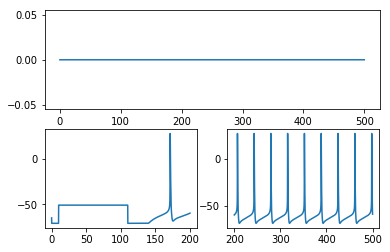

In [15]:
exc.visualize_all(chosenmodel = desired_model, roi="soma v")

### 4.3. Visualize all events in one plot

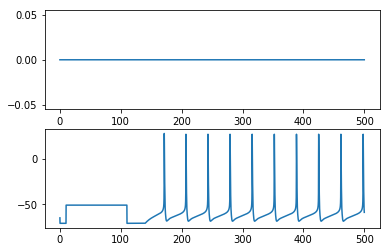

In [16]:
ec.visualize_aio(chosenmodel = desired_model, roi="soma v")